<h1><center>Predicting import vehicle prices</center></h1>
<h3><center>Predicting the prices of cars and trucks imported in 1985</center></h3>

The aim of this project is to analyze the various characteristics of a vehicle and eventually predict the price of the vehicle given its various characteristics. This can be helpful when trying to understand the market, which features are pricing points and based on the features of the vehicle, what could be its price, for a new manufacturer.
The dataset can be found at this <a href="https://archive.ics.uci.edu/ml/datasets/automobile">Link</a><br>
The dataset contains information on 205 vehicles imported in the year of 1985 from various manufacturers. It is a dataset from the UCI repository of automobiles. The column description is as follows:- 

1. symboling: Insurance Risk factor associated with the price, -3 : very safe, 3 : very risky.
2. normalized-losses: Relative average payment per insured vehicle year.
3. make: The make of the vehicle.
4. fuel-type: Fuel type, disel or gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: Distance between centers of front and rear axles.
11. length: Length of the vehicle.
12. width: Width of the vehicle.
13. height: Height of the vehicle.
14. curb-weight: Total mass of vehicle.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: Size of the engine
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: Diameter of piston cylinder.
20. stroke: Stroke length of the piston cylinder.
21. compression-ratio: Ratio of volume of cylinder and combustion chamber.
22. horsepower: Horsepower of the vehicle.
23. peak-rpm: Max achievable RPM.
24. city-mpg: Lowest mpg rating for the vehicle.
25. highway-mpg: Highest mpg rating for the vehicle.
26. price: Price of the car

There are a total of 25 characteristics related to a vehicle that have to be analyzed in order to find the best predictors for its price.

In [1]:
%matplotlib inline
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso,Ridge,ElasticNet
from sklearn.feature_selection import RFE
from statsmodels.regression.linear_model import WLS

In [2]:
df = pd.read_csv('imports-85.data',header=None)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


The dataset inherently doesnot have column names. The column names have been picked up from the above specified link.

In [3]:
cols = [
    'symboling', 'normalized_losses', 'make', 'fuel_type',
    'aspiration', 'num_of_doors', 'body_style', 
    'drive_wheels', 'engine_location', 'wheel_base',
    'length', 'width', 'height', 'curb_weight', 'engine_type', 
    'num_of_cylinders', 'engine_size', 'fuel_system', 'bore',
    'stroke', 'compression_rate', 'horsepower', 
    'peak_rpm', 'city_mpg', 'highway_mpg', 'price'
       ]

df.columns = cols
df.head(10)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [4]:
df.isna().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_rate     0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

The dataset as such doesnot contain any NaN values, but there are '?' as values, which in this case are reprsenting NaN values. The preliminary step would be to re-read the dataset with the `na_values` parameter set to '?'. This will read in the dataset and at every encounter of '?' will be replaced with `np.NaN`.

In [5]:
df = pd.read_csv('imports-85.data',header=None, na_values='?')
df.columns = cols
df.head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [6]:
df.isna().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_rate      0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

The dataset is pretty much clean except a few columns containing Null values. These Null values have to be cleaned before starting analysis on it.<br>
The `price` column is the target variable. Since the aim is to eventually predict the price, at this point imputing is not possible. Thus it would be wise to drop the 4 rows, there isnt much loss of information as well.

In [7]:
df = df[~df.price.isna()]

The *normalized_losses* column contains the maximum `NaN` values the dataset. Dropping 41 rows will highly reduce the dataset and possibly lose out on valuable information of other columns.<br>
These `NaN` values have to be imputed. The distribution of *normalized_losses* column can give a sense of how this can be achieved.

Text(0.5, 1.0, 'Distribution of Normalized losses')

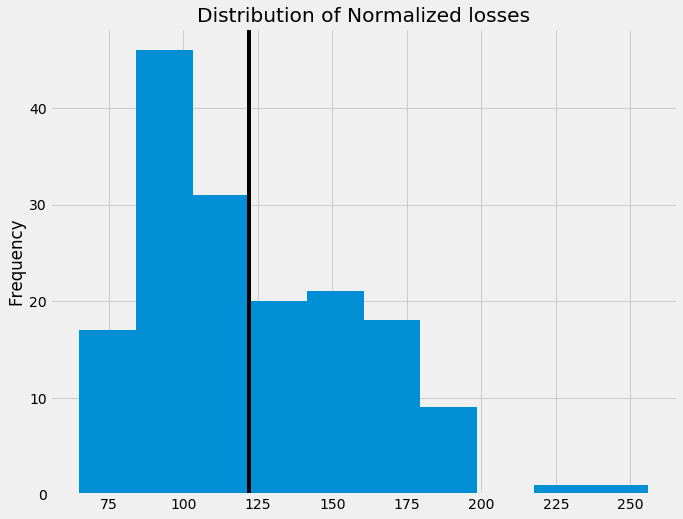

In [8]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))
df['normalized_losses'].plot.hist()
plt.axvline(df['normalized_losses'].mean(),color='black')
plt.title('Distribution of Normalized losses')

The distribution shows that most of the *normalized_losses* values are close to the mean. Thus imputing the 41 rows missing data with the mean will not change the general distribution of the column.

In [9]:
df['normalized_losses'].fillna(
    df['normalized_losses'].mean(),inplace=True
)

The *bore* and *stroke* columns have 4 missing values. The *bore* defines the diameter of the piston cylinder and *stroke* defines the length of the piston cylinder. These values are usually specific to a vehicle and even vehicles from the same manufacturer do not have the same values for *bore* and *stroke*. Imputing these values requires alot of other parameters such as *horsepower*, *engine capacity*, *pressure values*, *stroke length* etc.

In [10]:
df[df.bore.isna()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


Analyzing the missing values, the rows containing the missing *bore* values also have missing values for *stroke*. This makes it impossible to derive either *bore* or *stroke* values for these rows. Since the question is of 4 rows, these can be ignored without possible loss of information.

In [11]:
df.dropna(subset=['bore','stroke'],inplace=True)

The *horsepower* and the *peak_rpm* columns both contain 2 missing values. A closer look into the missing values shows that the same two vehicles have missing *horsepower* and *peak_rpm*. Due to lack of data, these values cannot be calculated readily. Hence these two rows are also dropped from the dataset.

In [12]:
df[df.horsepower.isna()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
130,0,122.0,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295.0
131,2,122.0,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895.0


In [13]:
df.dropna(subset=['horsepower','peak_rpm'],inplace=True)

In [14]:
df.body_style.value_counts()

sedan          94
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body_style, dtype: int64

The *num_of_doors* is the last column left to clean. This column also contains 2 missing rows. A closer look into these rows reveals that both the vehicles listed were *sedans*. The *body_style* of the vehicle identifies whether the vehicle is a *sedan*, *hatchback*, *convertible*, *hardtop* or a *wagon*. Usually the same style of vehicles have similar body charateristics like number of doors, for example, a *convertible* usually is a 2-door vehicle. Needless to say that there are exceptions, but the general trend is followed. Going by this trend, a *sedan* usually has 4 doors. Thus the two missing values are imputed with the mode of the column for *sedans*.

In [15]:
df[df['num_of_doors'].isna()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,122.0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [16]:
df[df['body_style'] == 'sedan']['num_of_doors'].value_counts()

four    78
two     14
Name: num_of_doors, dtype: int64

In [17]:
df['num_of_doors'].fillna(
    df[df['body_style'] == 'sedan']['num_of_doors'].mode()[0],
    inplace=True
)

The dataset is clean from any missing values. The next step is to analyze these various charateristics. The *price* column is the target column for the predictive modeling and the base for the analysis. Looking into the distribution of price via a box plot reveals a significant number of outliers.

Text(0.5, 1.0, 'Price distribution')

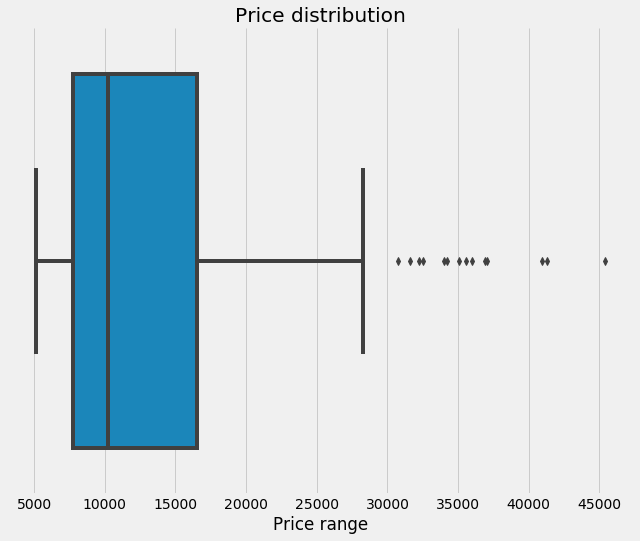

In [18]:
plt.figure(figsize=(10,8))
sns.boxplot(df.price)
plt.xlabel('Price range')
sns.despine(left=True)
plt.title('Price distribution')

The outliers exist beyond the 30k mark. This data could be faulty and hence requires a detailed analysis for those vehicles listed with a price greater than 30k.

In [19]:
df[df.price > 30000]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
15,0,122.0,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0
16,0,122.0,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
17,0,122.0,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0
47,0,145.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,32250.0
48,0,122.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,35550.0
49,0,122.0,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17,36000.0
70,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600.0
71,-1,122.0,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,34184.0
72,3,142.0,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,35056.0
73,0,122.0,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,40960.0


The outliers do not look faulty, rather the vehicles listed are high end vehicles from world class manufacturers - *jaguar*, *mercedes benz*, *porsche* and *bmw*. These prices are a result of these vehicles being luxury/sports car from these manufacturers.<br>

The *city_mpg* column describes the average miles per gallon (mileage) the car delivers when driven in the city with occasional accelerations and brakes. Similarly the *highway_mpg* describes the average miles per gallon (mileage) the car delivers under continuos acceleration. The two metrics are considered very important for a vehicle.

Text(0.5, 1.0, 'Price vs highway mileage')

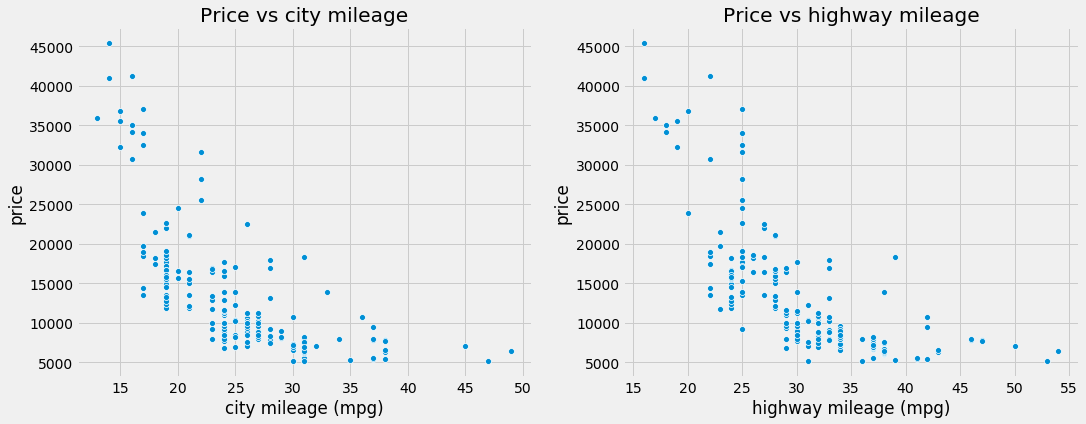

In [20]:
plt.style.use('fivethirtyeight')
plt.subplots(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(y='price',x='city_mpg',data=df)
plt.xlabel('city mileage (mpg)')
plt.title('Price vs city mileage')
plt.subplot(1,2,2)
sns.scatterplot(y='price',x='highway_mpg',data=df)
plt.xlabel('highway mileage (mpg)')
plt.title('Price vs highway mileage')

From the two scatter plots, the following conclusions are drawn :-

* Both city mileage and highway mileage (in mpg) are negatively correlated to the price of the vehicle
* High end luxury or sports vehicles have lesser city and highway mileage (in mpg).

The *city_mpg* and *highway_mpg* define individual charateristics of the vehicle, both measured separately. These values for a vehicle are measured under the assumption that the car is driven only in particular setting i.e. *city_mpg* for a vehicle is measured under the assumption that the vehicle is only driven in the city.<br>
In reality the vehicle isnt always only exposed to either one. There is a combination of both city driving and highway driving, this makes a huge difference in the actual mileage (in mpg) the vehicle can achieve. Thus *fuel economy* metric is dervied. The *fuel economy* is assumed to be 60% of *city_mpg* and 40% of *highway_mpg*. Intuitively this means that the *fuel economy* gives the average miles per gallon (mpg) for a vehicle that is driven 60% of the times in a city and the rest on a highway. This assumption seems fair and realistic.

In [21]:
df['fuel_economy'] = (df.city_mpg * 0.6) + (df.highway_mpg * 0.4)
df.head(10)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price,fuel_economy
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,23.4
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,23.4
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,21.8
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,26.4
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,19.6
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0,21.4
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0,21.4
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0,21.4
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0,18.2
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430.0,25.4


Text(0.5, 1.0, 'Price vs Fuel economy')

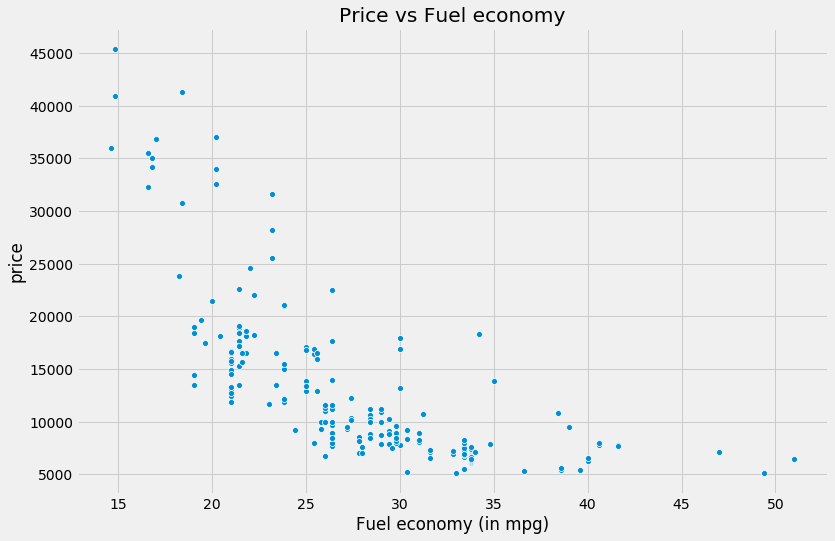

In [22]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.scatterplot(x='fuel_economy',y='price',data=df)
plt.xlabel('Fuel economy (in mpg)')
plt.title('Price vs Fuel economy')

Since the *fuel_economy* is a representation of the *city_mpg* and *highway_mpg* combined, it mimics the trend as seen above.

The following columns are numeric in nature and mostly describe physical specifications of the vehicle :-

* wheel_base
* length
* width
* height
* curb_weight
* engine_size
* bore
* stroke
* compression_rate
* horsepower
* peak_rpm

The next set of plots analyze these values against the price of the vehicle in a regression plot. The `regplot` fits a regressor to the data and draws the best fitting line across the data. The `regplot` gives insight into the relationship between two variables. This shall give an idea as to which charateristics are correlated to the price.

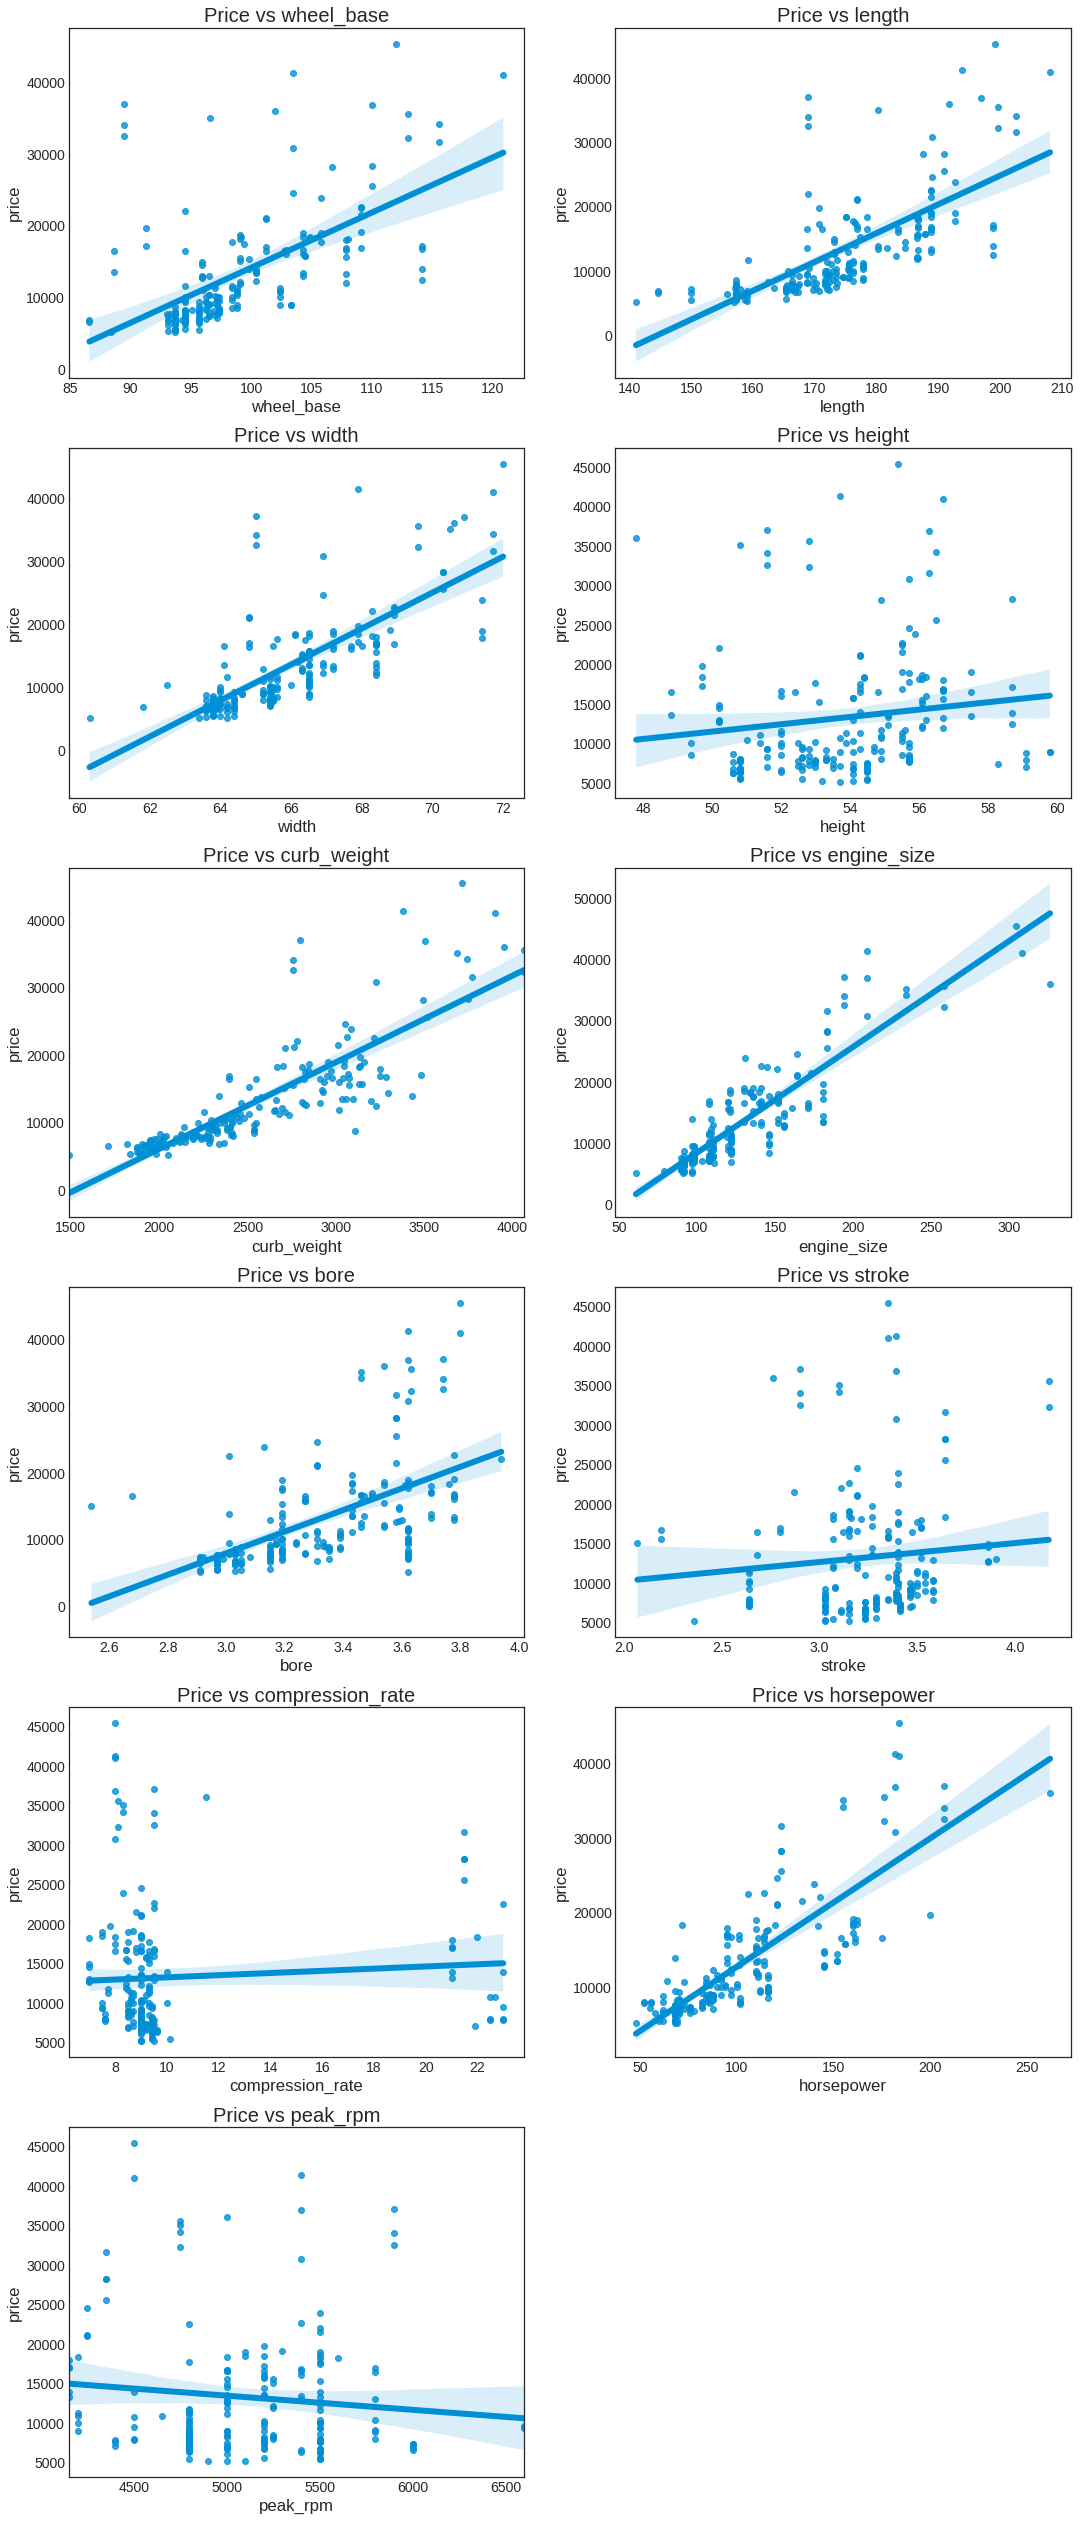

In [23]:
cols = [
    'wheel_base',
    'length',
    'width',
    'height',
    'curb_weight',
    'engine_size',
    'bore',
    'stroke',
    'compression_rate',
    'horsepower',
    'peak_rpm'
]

plt.style.use('seaborn-white')
plt.subplots(figsize=(16,42))
i=1
for col in cols:
    plt.subplot(6,2,i)
    sns.regplot(x=col,y='price',data=df)
    plt.title('Price vs '+col)
    i+=1
    

The following conclusions are drawn from the scatter plot :-

* The wheel base of a vehicle shows slight positive correlation with the price. For a certain wheel-base there is a huge band within which the prices of the vehicles lie.
* The length and width of the vehicle share a linear relationship with the price and are highly positively correlated. This means, the length and width of the vehicle can be a determining charateristic for its price.
* The height of the car has a slight positive correlation, but not enough to conclude a linear relationship. The height doesnot dictate the price of the vehicle.
* The curb_weight has a linear relationship with price of vehicle. High end vehicles have higher curb weights i.e they are heavier packed vehicles.
* The engine_size and horsepower share a linear relationship with price. High end vehicles pack a punch when it comes to power of the vehicle.
* The bore shows high positive correlation with the price whereas the stroke doesnot show a clear linear relationship.
* Compression rate and Peak RPM have no relations with the price as such.

From these conclusions, it can be said that the following columns can be definte predictors for the price of the vehicle :-

* length
* width
* curb_weight
* engine_size
* horsepower
* bore
* wheel_base

The *normalized_losses* column describes the average loss the car can incur per year. Viewing these losses against the price via a scatterplot.

Text(0.5, 1.0, 'Price vs Normalized losses')

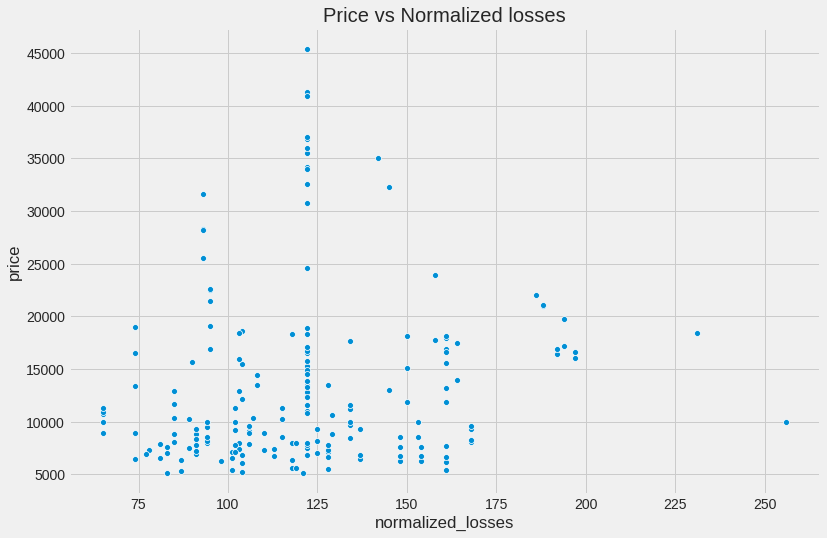

In [24]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.scatterplot(x='normalized_losses',y='price',data=df)
plt.title('Price vs Normalized losses')

The *normalized_losses* shares no relationship with the price. Mostly the losses for high end vehicles is at the mean.<br>

Analyzing all the numeric columns leads to the conclusion that - Most of the numeric columns share a linear relationship with the price of the vehicle as identified. These charateristics can be good predictors for the target price. The dataset also contains categorical variables. These variables have to be compared against the price to find some relations.<br>

The *symboling* column descibes the risk factor invovled with the price of a car. A value of +3 means very risky and -2 means pretty safe. the symbols are first changed to labels as given below then compared with price.

* Very safe - -2
* Safe - -1
* Neutral - 0
* Maybe risky - 1
* Risky - 2
* Very risky - 3

Text(0.5, 1.0, 'Price distribution of vehicles sold per symboling label')

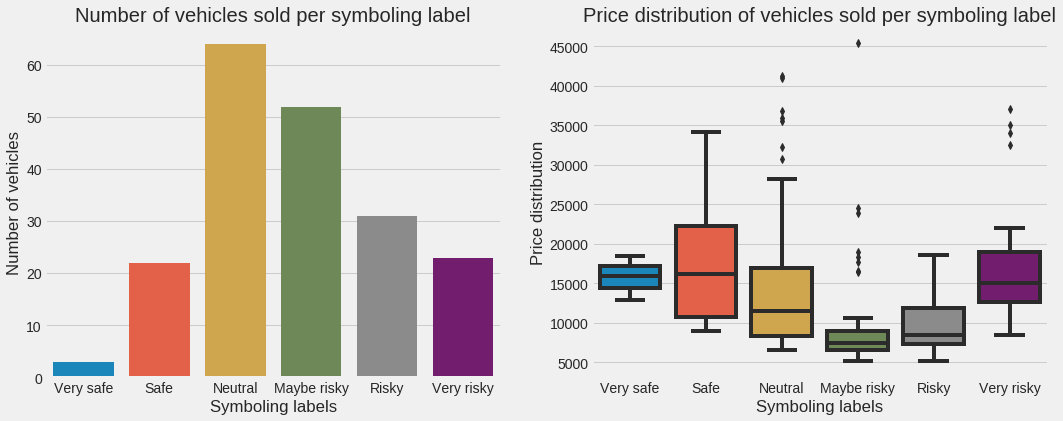

In [25]:
def decode(row):
    if row == -2:
        return 'Very safe'
    elif row == -1:
        return 'Safe'
    elif row == 0:
        return 'Neutral'
    elif row == 1:
        return 'Maybe risky'
    elif row == 2:
        return 'Risky'
    else:
        return 'Very risky'
    
df['symboling_labels'] = df.symboling.apply(decode).astype(
    CategoricalDtype(
        categories=['Very safe','Safe','Neutral','Maybe risky','Risky','Very risky'],
        ordered=True
    )
)

plt.style.use('fivethirtyeight')
plt.subplots(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(df.symboling_labels)
plt.ylabel('Number of vehicles')
plt.xlabel('Symboling labels')
plt.title('Number of vehicles sold per symboling label')
plt.subplot(1,2,2)
sns.boxplot(x=df.symboling_labels, y=df.price)
plt.ylabel('Price distribution')
plt.xlabel('Symboling labels')
plt.title('Price distribution of vehicles sold per symboling label')

The symboling plots suggest :-

* The vehicles with a symbol rating of 0 - Neutral, are maximum sold.
* Vehicles with a symbol rating of -1 - Safe have higher prices.

The *make* of a vehicle identifies the manufacturer of the vehicle and *body_style* identifies the type of vehicle as discussed previously. The two bar plots below show the number of vehicles sold per maker and per body type.

Text(0.5, 1.0, 'Price distribution per vehicle type')

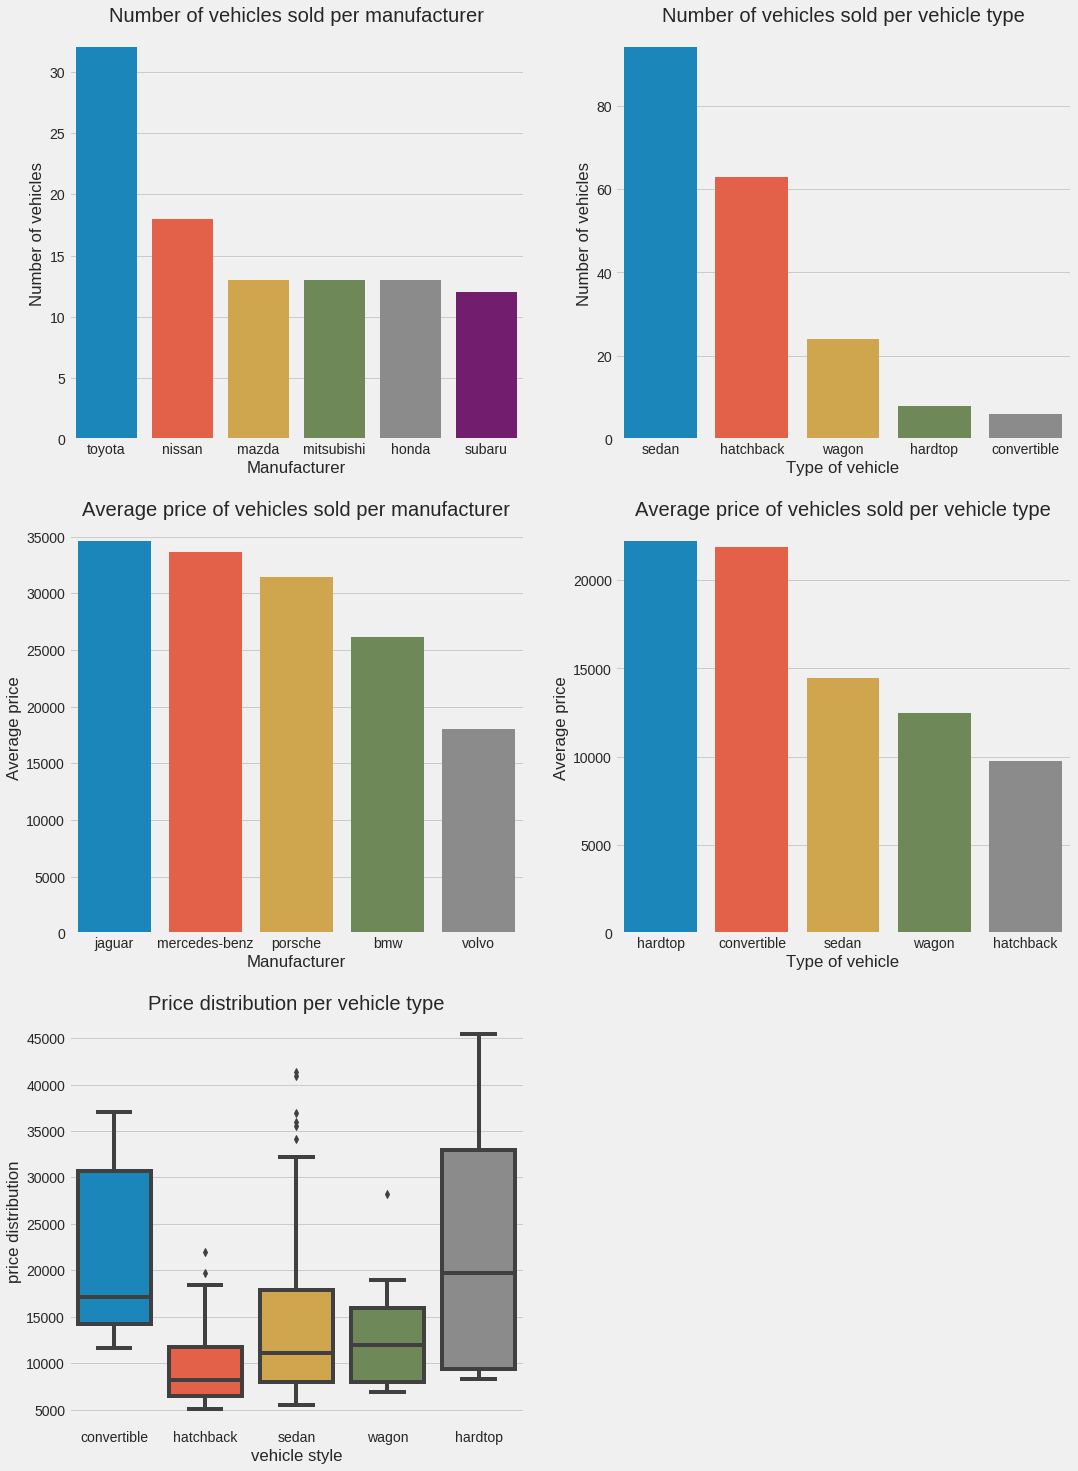

In [26]:
makers = df.make.value_counts().sort_values(ascending=False)
styles = df.body_style.value_counts().sort_values(ascending=False)
makers_price = df.pivot_table(values='price',index='make').sort_values('price',ascending=False)
styles_price = df.pivot_table(values='price',index='body_style').sort_values('price',ascending=False)


plt.style.use('fivethirtyeight')
plt.subplots(figsize=(16,24))
plt.subplot(3,2,1)
sns.barplot(x=makers.index[:6],y=makers.values[:6])
plt.xlabel('Manufacturer')
plt.ylabel('Number of vehicles')
plt.title('Number of vehicles sold per manufacturer')
plt.subplot(3,2,2)
sns.barplot(x=styles.index,y=styles.values)
plt.ylabel('Number of vehicles')
plt.xlabel('Type of vehicle')
plt.title('Number of vehicles sold per vehicle type')
plt.subplot(3,2,3)
sns.barplot(makers_price.index[:5],makers_price.price[:5])
plt.ylabel('Average price')
plt.xlabel('Manufacturer')
plt.title('Average price of vehicles sold per manufacturer')
plt.subplot(3,2,4)
sns.barplot(styles_price.index,styles_price.price)
plt.ylabel('Average price')
plt.xlabel('Type of vehicle')
plt.title('Average price of vehicles sold per vehicle type')
plt.subplot(3,2,5)
sns.boxplot(x=df.body_style,y=df.price)
plt.xlabel('vehicle style')
plt.ylabel('price distribution')
plt.title('Price distribution per vehicle type')

Inferences :-

* Toyota is the most sold vehicle in the dataset. Other manufacturers have relatively lesser vehicles sold.
* Sedan body type is the most sold vehicle type. Hatchback is the second most sold. The other categories have very less sold.
* Manufacturers sell cars for different price ranges i.e. usually they have cars for lower range, mediocre range and higher range, thus manufacturer cannot be used to predict the price of a car.
* Hardtop and convertibles have the highest average price ranges. 
* Every body style has vehicles of different price ranges for example, hardtops and convertibles are in high end vehicles whereas sedans and wagons are in moderate price ranges. Hatchbacks are in the lowest price range.

The columns - *fuel_type*, *aspiration*, *engine_location* and *num_of_doors* are two-category variables describing the latent features of the vehicle.

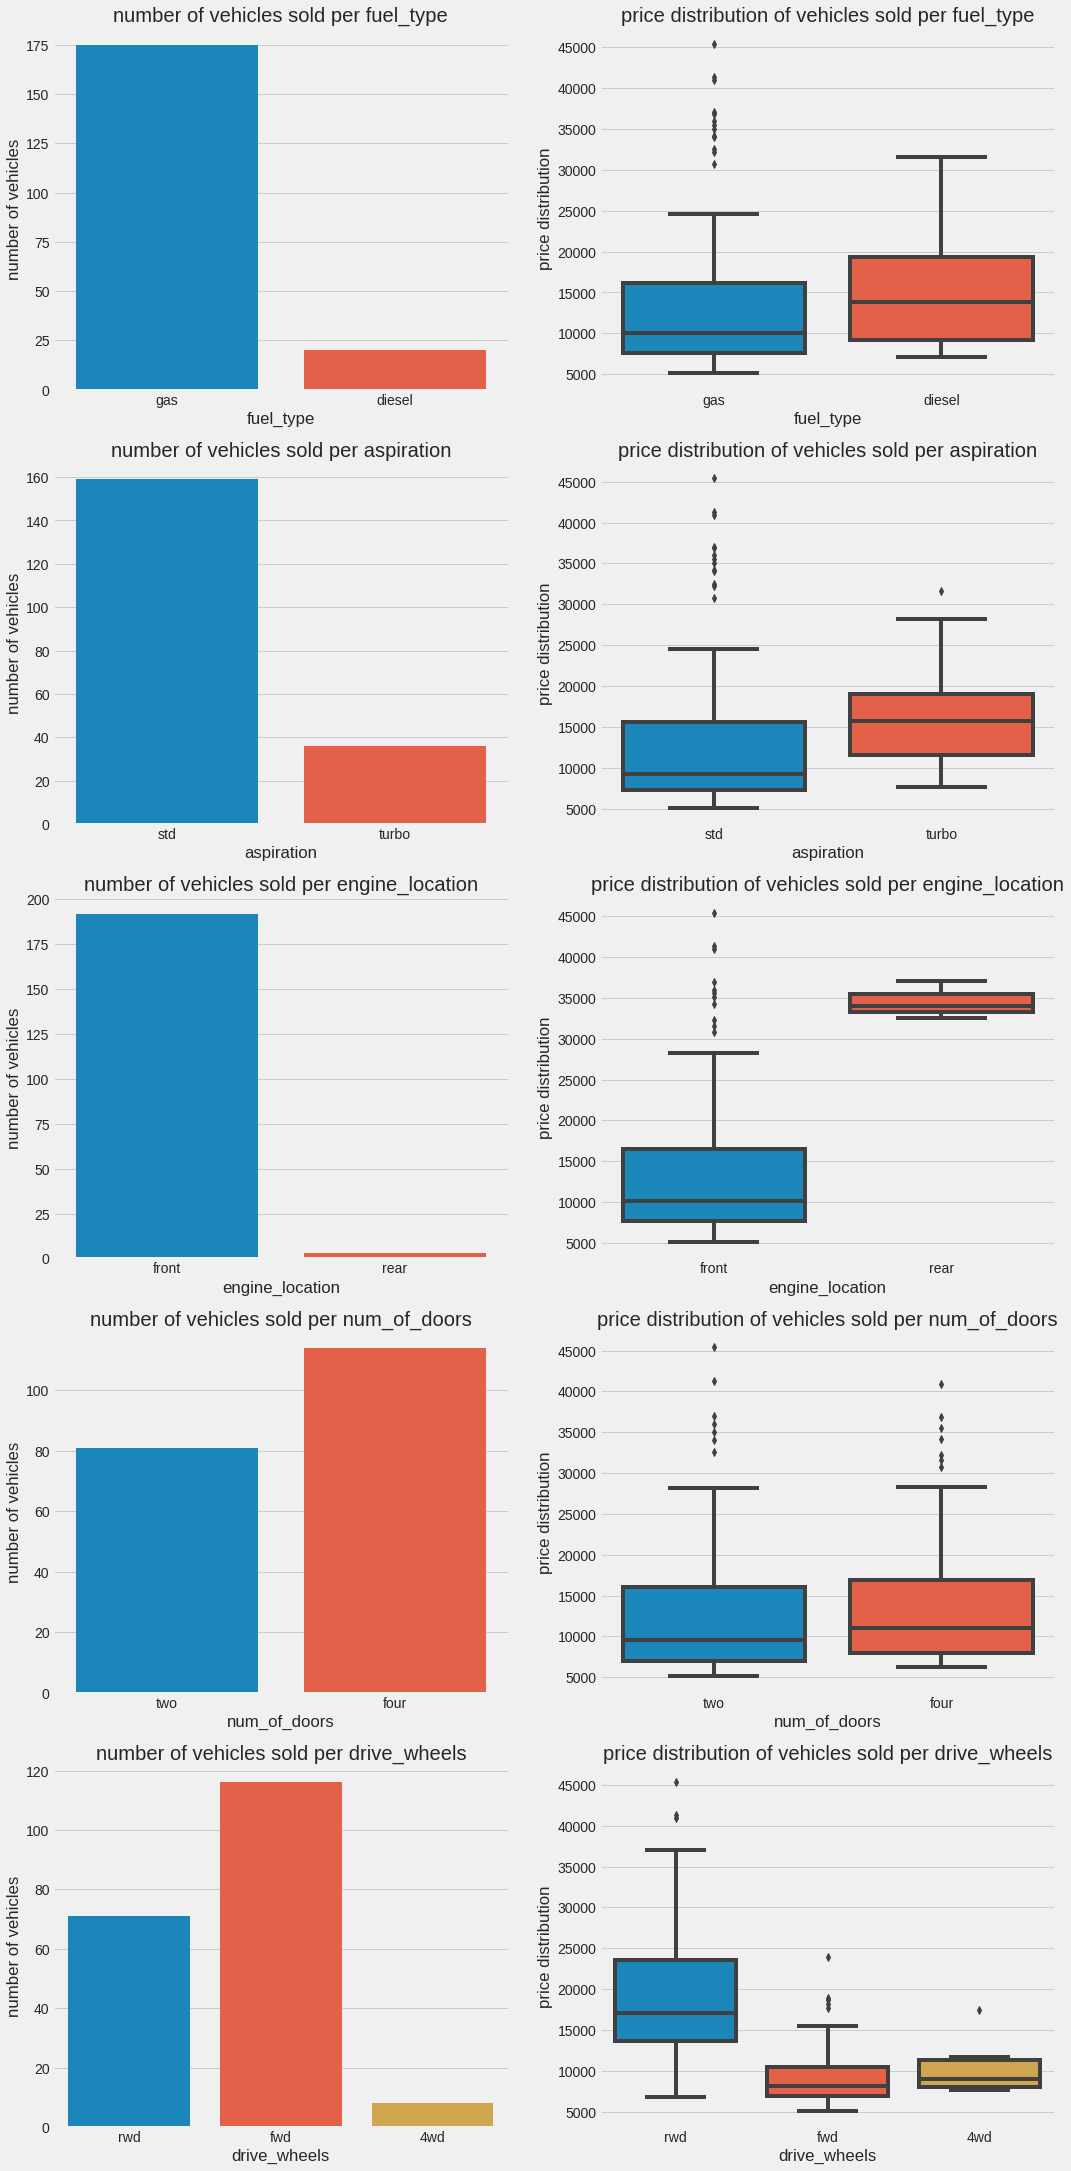

In [27]:
cols = [
    'fuel_type',
    'aspiration',
    'engine_location',
    'num_of_doors',
    'drive_wheels'
]

plt.style.use('fivethirtyeight')
plt.subplots(figsize=(16,36))
i=1
for col in cols:
    plt.subplot(5,2,i)
    sns.countplot(df[col])
    plt.ylabel('number of vehicles')
    plt.title('number of vehicles sold per '+col)
    i+=1
    plt.subplot(5,2,i)
    sns.boxplot(x=df[col],y=df.price)
    plt.ylabel('price distribution')
    plt.title('price distribution of vehicles sold per '+col)
    i+=1

The conclusions drawn :- 

* Four door vehicles are most sold among the lot. The number of doors do not add much to the price.
* Most vehicles have engines in the front except a very few. The very few that have engines at the rear have very high price points. A few of the high end vehicles can be said to have rear engines.
* Turbo engine vehicles are higher priced than standard engine vehicles, but standard engine vehicles are most sold.
* Disel vehicles are priced higher than gas vehicles, but gas vehicles are most sold.
* Forward wheel drive vehicles are most sold. The rear wheel drive vehicles are ranged at higher price points.

Out of the above characteristics, *aspiration*, *drive_wheels* and *fuel_type* seem like good predictors for the price of the vehicle. The *engine_location* though showing distinct price gap, has too few representatives for *rear* category.<br>
The *engine_type* describes the build of the engine from the manufacturer.

                    price
engine_type              
dohc         18116.416667
ohcv         25098.384615
ohc          11594.944056
l            14627.583333
ohcf         13738.600000


Text(0.5, 1.0, 'Average price of vehicles sold per engine type')

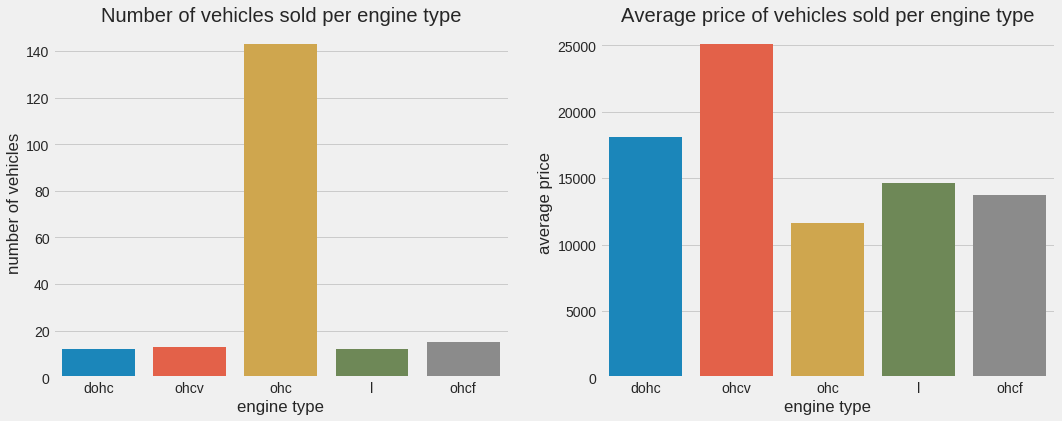

In [29]:
engines = df[['engine_type','price']].groupby('engine_type').mean()
engines.sort_values('price',ascending=False,inplace=True)
engines = engines.iloc[[1,0,4,2,3]]
print(engines)

plt.subplots(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(df.engine_type)
plt.ylabel('number of vehicles')
plt.xlabel('engine type')
plt.title('Number of vehicles sold per engine type')
plt.subplot(1,2,2)
sns.barplot(x=engines.index,y=engines.price)
plt.ylabel('average price')
plt.xlabel('engine type')
plt.title('Average price of vehicles sold per engine type')

The conclusions drawn :- 

* Vehicles with ohc engine type are most sold, but they have the least average price. Thus vehicles with ohc engine type have lesser price points and are most sold.
* Vehicles with the ohcv engine type are priced costlier than the rest.

The plots conclude that engine type can determine the average price range of the vehicle and hence makes it an important charateristic for the prediction of the price.<br>

The final categorical column, *num_of_cylinders* is an important parameter for an engine and determeines the power of the engine. The plots below visualize the number of vehicles sold per number of cylinders and the average price range of the vehicles sold per number of cylinders.

                         price
num_of_cylinders              
four              10312.335484
six               23671.833333
five              22007.600000
three              5151.000000
twelve            36000.000000
eight             38900.000000


Text(0.5, 1.0, 'Average price of vehicles sold per number of cylinders')

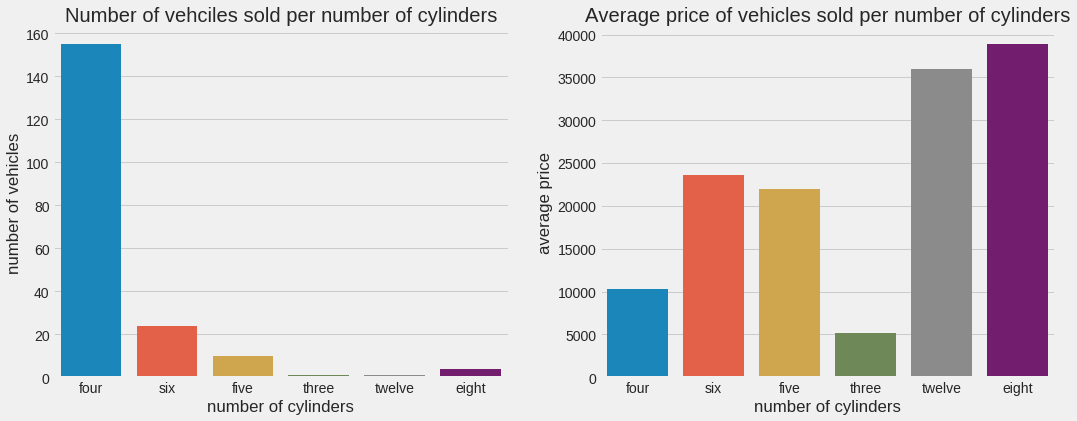

In [30]:
cylinders = df[['num_of_cylinders','price']].groupby('num_of_cylinders').mean()
cylinders.sort_values('price',ascending=False,inplace=True)
cylinders = cylinders.iloc[[4,2,3,5,1,0]]
print(cylinders)

plt.subplots(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(df.num_of_cylinders)
plt.ylabel('number of vehicles')
plt.xlabel('number of cylinders')
plt.title('Number of vehciles sold per number of cylinders')
plt.subplot(1,2,2)
sns.barplot(x=cylinders.index,y=cylinders.price)
plt.ylabel('average price')
plt.xlabel('number of cylinders')
plt.title('Average price of vehicles sold per number of cylinders')

* Vechiles with a four cylinder engine were sold the most and have a moderate price range.
* High end vehicles boast a twelve or eight cylinder engine, but are the less sold.


The analysis completes here. Based on the analysis, the charateristics that are estimated to be good predictors are :-

* length
* width
* curb_weight
* engine_size
* horsepower
* bore
* wheel_base
* aspiration
* drive_wheels
* fuel_type
* fuel_economy
* engine_type
* num_of_cylinders

Removing the other columns from the dataset.

In [31]:
cols = [
    'length',
    'width',
    'curb_weight',
    'engine_size',
    'horsepower',
    'bore',
    'wheel_base',
    'aspiration',
    'drive_wheels',
    'fuel_type',
    'fuel_economy',
    'engine_type',
    'num_of_cylinders',
    'price',
    'body_style'
]

df = df[cols]
df.head(5)

,length,width,curb_weight,engine_size,horsepower,bore,wheel_base,aspiration,drive_wheels,fuel_type,fuel_economy,engine_type,num_of_cylinders,price,body_style
0,168.8,64.1,2548,130,111.0,3.47,88.6,std,rwd,gas,23.4,dohc,four,13495.0,convertible
1,168.8,64.1,2548,130,111.0,3.47,88.6,std,rwd,gas,23.4,dohc,four,16500.0,convertible
2,171.2,65.5,2823,152,154.0,2.68,94.5,std,rwd,gas,21.8,ohcv,six,16500.0,hatchback
3,176.6,66.2,2337,109,102.0,3.19,99.8,std,fwd,gas,26.4,ohc,four,13950.0,sedan
4,176.6,66.4,2824,136,115.0,3.19,99.4,std,4wd,gas,19.6,ohc,five,17450.0,sedan


The categorical variables are converted to binary dummy variables using `pd.get_dummies`. Once all column are in numeric form, using the `StandardScaler` from `sklearn.preprocessing` module, normalization is performed. This is done because, the columns are in on different scales.

In [32]:
X = df.drop('price',axis=1)
y = df.price

X = pd.get_dummies(X)
scaler = StandardScaler()
X_res = pd.DataFrame(scaler.fit_transform(X))
X_res.head(5)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-0.438504,-0.839749,-0.021018,0.049883,0.204599,0.518555,-1.683439,-0.639027,0.475831,-0.475831,...,-0.232495,0.508001,-0.374634,-0.071796,-0.071796,5.612486,-0.206835,-0.690849,-0.964724,-0.374634
1,-0.438504,-0.839749,-0.021018,0.049883,0.204599,0.518555,-1.683439,-0.639027,0.475831,-0.475831,...,-0.232495,0.508001,-0.374634,-0.071796,-0.071796,5.612486,-0.206835,-0.690849,-0.964724,-0.374634
2,-0.245646,-0.181548,0.504425,0.582216,1.342993,-2.394771,-0.718803,-0.884745,0.475831,-0.475831,...,-0.232495,-1.968502,2.669270,-0.071796,-0.071796,-0.178174,-0.206835,1.447494,-0.964724,-0.374634
3,0.188283,0.147553,-0.424175,-0.458253,-0.033670,-0.514016,0.147735,-0.178304,0.475831,-0.475831,...,-0.232495,0.508001,-0.374634,-0.071796,-0.071796,-0.178174,-0.206835,-0.690849,1.036566,-0.374634
4,0.188283,0.241582,0.506335,0.195065,0.310496,-0.514016,0.082336,-1.222609,0.475831,-0.475831,...,4.301163,-1.968502,-0.374634,-0.071796,-0.071796,-0.178174,-0.206835,-0.690849,1.036566,-0.374634


The feature set is broken down into training and testing sets for building the model.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y,random_state=1)

The models tested here are the `KNeighborsRegressor` and the `LinearRegression`.<br>

Usually different manufacturers produce vehicles at different price ranges for every segment of the economy. Say there are two manufacturers - Renault and Subaru. Both these manufacturers will have a car for the lower range, a car for the mediocre range and a car at high end range. The cars at lower range usually have a lot of charateristics in the same neighbourhood such as engine_size, horsepower, drive_wheels, aspiration, fuel economy etc. Using `KNeighborsRegressor`, such clusters will be identified and for every prediction, the price would be the mean of this cluster of cars with similar charateristics. This model can have issues since the number of vehicles are too less thus not giving a complete idea of the vehicles a manufacturer sells.

All throughout the analysis, it was clear that many variables share a linear relationship with the price variable. All numrical columns chosen were either positively or negatively correlated to the price. This was confirmed in the `regplot`s. The categorical varibles also showed distinct average price differences, leading to the conclusion that a certain category can give an idea about the price of the vehicle. The `LinearRegression` model is used keeping all of this in mind.

The above reasoning explains why the two models have been chosen for building the final model.

In [34]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train,y_train)

pred = knn.predict(X_train)
print("Train score: ",r2_score(pred,y_train))

pred = knn.predict(X_test)
print("Test_score: ",r2_score(pred,y_test))

print("RMSE: ",np.sqrt(mean_squared_error(pred,y_test)))
print("MAE: ",mean_absolute_error(pred,y_test))

Train score:  0.9982318952770243
Test_score:  0.8396070972956275
RMSE:  3737.26141413081
MAE:  2438.5510204081634


The `KNeighborsRegressor` achieves a good `r2_score` of about 83.96% on the test set. The RMSE values indicate the average error in a prediction made by the model. The model achieves a good RMSE value - 3737.26.
The models seems to have worked well, with the n_neighbors paramter set to 2.<br>
Comapring the model with `LinearRegression` is neccessary as it can give insights to how well this model works.

In [35]:
lm = LinearRegression()
lm.fit(X_train,y_train)

pred = lm.predict(X_train)
print("Train score: ",r2_score(pred,y_train))

pred = lm.predict(X_test)
print("Test_score: ",r2_score(pred,y_test))

print("RMSE: ",np.sqrt(mean_squared_error(pred,y_test)))
print("MAE: ",mean_absolute_error(pred,y_test))

Train score:  0.8914832054451866
Test_score:  0.855910012633967
RMSE:  3181.0322780707743
MAE:  2212.806213059051


`LinearRegression` gives round about the same result, with a test set `r2_score` of 85.59%, the RMSE value has decreased for this model, which is now said to have an average error of about 3181.03 in predictions. Taking a closer look at the coefficients 

In [36]:
print("intercept : ",lm.intercept_)
for col,coef in zip(X.columns,lm.coef_):
    print(col, " : ",coef)

intercept :  13240.364283181842
length  :  69.05001567827414
width  :  -312.64657177503926
curb_weight  :  3112.6422247921687
engine_size  :  -168.76840324099993
horsepower  :  3358.0603396880524
bore  :  -334.5993021207858
wheel_base  :  525.3453228799971
fuel_economy  :  51.35374451761106
aspiration_std  :  152.29063205157854
aspiration_turbo  :  -152.29063205158377
drive_wheels_4wd  :  -192.65794100608596
drive_wheels_fwd  :  -102.3344355733428
drive_wheels_rwd  :  183.82258381712714
fuel_type_diesel  :  282.1211482052628
fuel_type_gas  :  -282.1211482052585
engine_type_dohc  :  -531.9238114834744
engine_type_l  :  30.272123574678087
engine_type_ohc  :  727.6095684879377
engine_type_ohcf  :  778.0690284738686
engine_type_ohcv  :  -1637.7955847905962
num_of_cylinders_eight  :  1815.84020805974
num_of_cylinders_five  :  302.83823993731977
num_of_cylinders_four  :  -1531.9516188248065
num_of_cylinders_six  :  774.735747928345
num_of_cylinders_three  :  124.62799296438376
num_of_cylinde

It is observed that the coefficients of the independent variables are quite high for some of these. Higher coefficients tend to dictate the model more developing bias. Thus regularization is necessary. `RidgeRegression` offers L2 regualrization, which reduces the coefficients using `alpha`. The `LassoRegression` offers L1 regualrization as well as feature selection, since out of independent variables that are correlated, it choses one of them to represent the group and become a predictor.<br>
A trade off between the two would be the `ElasticNet` which considers both L1 and L2 regularization. Instead of chosing just one of the group of correlated variables like Lasso, it considers the entire group as predictors as well as reduces the feature set. All this while also performing L2 regularization as Ridge.<br>

It is not guaranteed to give better results, but it would be helpful to try them out.

In [37]:
lm = Ridge(alpha=2)
lm.fit(X_train,y_train)

pred = lm.predict(X_train)
print("Train score: ",r2_score(pred,y_train))

pred = lm.predict(X_test)
print("Test_score: ",r2_score(pred,y_test))

print("RMSE: ",np.sqrt(mean_squared_error(pred,y_test)))
print("MAE: ",mean_absolute_error(pred,y_test))

Train score:  0.8889706653948796
Test_score:  0.8671449813077978
RMSE:  3076.4526038725635
MAE:  2168.362602263705


In [38]:
print("intercept : ",lm.intercept_)
for col,coef in zip(X.columns,lm.coef_):
    print(col, " : ",coef)

intercept :  13234.855514836217
length  :  346.307921997421
width  :  4.915165173945227
curb_weight  :  1910.0157142792557
engine_size  :  813.3823496623019
horsepower  :  2772.6679621879707
bore  :  -404.8681909574322
wheel_base  :  440.3772592669129
fuel_economy  :  -292.31922668139333
aspiration_std  :  35.115413618676634
aspiration_turbo  :  -35.1154136186765
drive_wheels_4wd  :  -254.01188086251113
drive_wheels_fwd  :  -178.49002931878687
drive_wheels_rwd  :  286.810728508113
fuel_type_diesel  :  286.93362467877745
fuel_type_gas  :  -286.93362467874874
engine_type_dohc  :  -481.2576295129912
engine_type_l  :  11.056378445288852
engine_type_ohc  :  639.6807356834718
engine_type_ohcf  :  782.1510033830963
engine_type_ohcv  :  -1516.5745120285826
num_of_cylinders_eight  :  1613.3496452200689
num_of_cylinders_five  :  256.4995246812394
num_of_cylinders_four  :  -1410.7354760799105
num_of_cylinders_six  :  745.6584665876092
num_of_cylinders_three  :  207.39371779678564
num_of_cylinders

As observed, `RidgeRegression` regularizes the independent variables, i.e. the coefficents have reduced, with an alpha setting of 2. The model performs well with a test set `r2_score` of 86.71% and an RMSE value of 3076.45.

In [39]:
lm = Lasso(alpha=4)
lm.fit(X_train,y_train)

pred = lm.predict(X_train)
print("Train score: ",r2_score(pred,y_train))

pred = lm.predict(X_test)
print("Test_score: ",r2_score(pred,y_test))

print("RMSE: ",np.sqrt(mean_squared_error(pred,y_test)))
print("MAE: ",mean_absolute_error(pred,y_test))

Train score:  0.8911175779094181
Test_score:  0.8586311970968112
RMSE:  3151.2074765843927
MAE:  2194.366681789046


In [40]:
print("intercept : ",lm.intercept_)
for col,coef in zip(X.columns,lm.coef_):
    print(col, " : ",coef)

intercept :  13240.997691614599
length  :  66.82300613817876
width  :  -213.42009123479866
curb_weight  :  2911.939004544829
engine_size  :  0.0
horsepower  :  3270.8875333165747
bore  :  -322.629650764538
wheel_base  :  483.1736098883539
fuel_economy  :  0.0
aspiration_std  :  271.5340440205393
aspiration_turbo  :  -9.425828954811123e-14
drive_wheels_4wd  :  -146.8886801446939
drive_wheels_fwd  :  -0.0
drive_wheels_rwd  :  305.5112144339379
fuel_type_diesel  :  562.1328948193295
fuel_type_gas  :  -1.243996881938771e-14
engine_type_dohc  :  -562.1374708518558
engine_type_l  :  -4.059435551121502
engine_type_ohc  :  628.4566219561877
engine_type_ohcf  :  707.3385785146162
engine_type_ohcv  :  -1670.9542579204797
num_of_cylinders_eight  :  1590.912455827576
num_of_cylinders_five  :  -0.0
num_of_cylinders_four  :  -2061.0296798989107
num_of_cylinders_six  :  324.50744348722424
num_of_cylinders_three  :  33.052553912359194
num_of_cylinders_twelve  :  314.3517367813086
body_style_convertibl

As said, `LassoRegression` performed L1 regualrization and feature selection of sorts. Some variables have a coefficient of 0 such as the *engine_type*, *aspiration* and *engine_size*. These variables were not significant to the prediction.<br>
`LassoRegression` has performed very well, with a test set `r2_score` of 85.86% and an RMSE value of 3151.20.

In [41]:
lm = ElasticNet(alpha=0.5,l1_ratio=1)
lm.fit(X_train,y_train)

pred = lm.predict(X_train)
print("Train score: ",r2_score(pred,y_train))

pred = lm.predict(X_test)
print("Test_score: ",r2_score(pred,y_test))

print("RMSE: ",np.sqrt(mean_squared_error(pred,y_test)))
print("MAE: ",mean_absolute_error(pred,y_test))

Train score:  0.8914400985686434
Test_score:  0.8568438026529581
RMSE:  3172.528610109757
MAE:  2208.337849138228


In [42]:
print("intercept : ",lm.intercept_)
for col,coef in zip(X.columns,lm.coef_):
    print(col, " : ",coef)

intercept :  13240.853030458207
length  :  73.6943214704772
width  :  -297.41912923007646
curb_weight  :  3063.0613347090143
engine_size  :  -116.25473036514512
horsepower  :  3339.089235082762
bore  :  -339.76124421255525
wheel_base  :  520.1333566235419
fuel_economy  :  38.912984786323115
aspiration_std  :  296.5004550472449
aspiration_turbo  :  -0.0
drive_wheels_4wd  :  -184.7269083328328
drive_wheels_fwd  :  -82.88720032552314
drive_wheels_rwd  :  209.03211353526098
fuel_type_diesel  :  564.2449608700294
fuel_type_gas  :  -0.0
engine_type_dohc  :  -561.5399806086097
engine_type_l  :  -0.0
engine_type_ohc  :  665.1613549382881
engine_type_ohcf  :  741.9968854766879
engine_type_ohcv  :  -1668.331895097389
num_of_cylinders_eight  :  1612.6300278784174
num_of_cylinders_five  :  -0.0
num_of_cylinders_four  :  -2077.11590986883
num_of_cylinders_six  :  320.7869987883807
num_of_cylinders_three  :  29.636584106001454
num_of_cylinders_twelve  :  328.08773434105836
body_style_convertible  : 

The `ElasticNet` model performs both L1 and L2 regularization. It has reduced the coefficents as well as performed feature selection (neglected fuel_type). The model does not out perform `RidgeRegression` but is in the same neighbourhood with reliable predictions. The model achieves a test set `r2_score` of 85.68% and an RMSE value of 3172.52.<br>
For this model, the residual plot is given below. Residual plot is the plot of predicted prices vs the error in each prediction. These plots show the variance in errors of the predictions.

Text(0.5, 1.0, 'Residual plot')

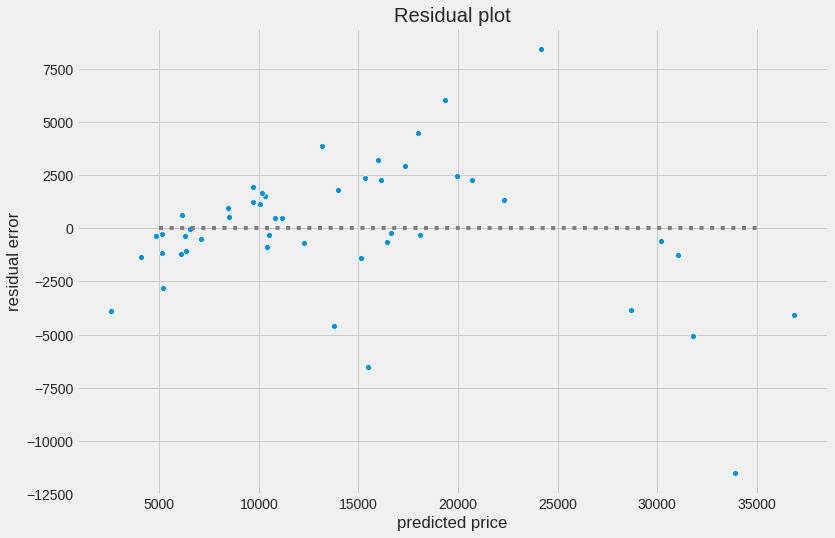

In [43]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.scatterplot(x=pred,y=(pred-y_test))
plt.hlines(0,xmax=35000,xmin=5000,linestyles='dotted',colors='grey')
plt.xlabel('predicted price')
plt.ylabel('residual error')
plt.title('Residual plot')

Text(0.5, 1.0, 'residual histogram')

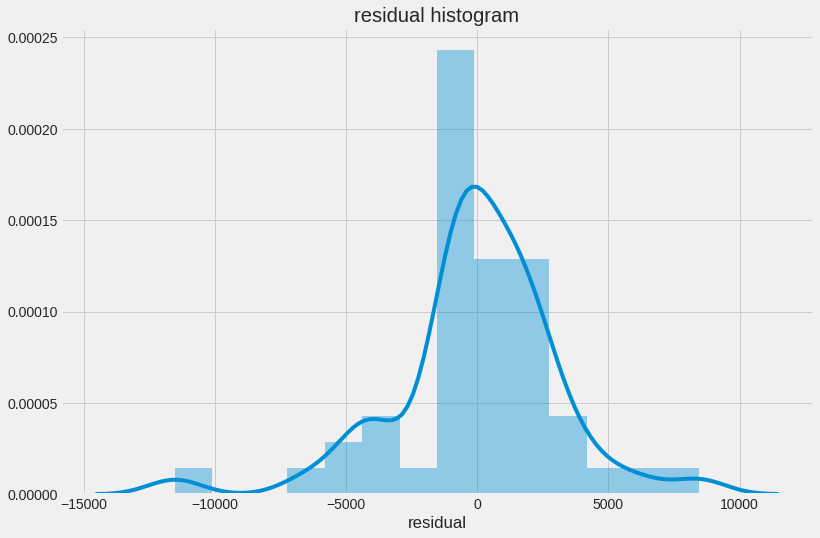

In [44]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.distplot((pred-y_test))
plt.xlabel('residual')
plt.title('residual histogram')

The residual plot, shows a sort of funnel shape. Given the dataset has very less data points, this shape seems distorted. But the presence of this shape indicated Heteroskedasticity. This means that the variance of errors is unequal along the price range. Simply put it can be observed that errors are smaller around smaller price range, but errors also increase as the price increases.<br>
To tackle heteroskedasticity, weighed regression can be performed. In this, every data point is assigned a weight based on variance of its fitted values. Small weights are given to observations associated with higher variances, to shrink the squared error (residual). The method used is the Weighted Least Squares (WLS).<br>
Assume the weights to be 

   1/variance<sub>i</sub>

where i is from 1 to n (number of samples)
Basically, a sample with high error variance is assigned a smaller weight and a sample with low variance in error is assigned higher weight. The weights are a 1D array, the length of the number of samples.

In [45]:
weights = X_train.apply(lambda x: np.var(x),axis=1).values.ravel('K')
weights

array([0.36355981, 0.47233522, 0.18755933, 0.31203838, 0.98163972,
       0.81534256, 0.62195724, 1.6757309 , 1.35736675, 0.49892083,
       0.34901347, 8.41810332, 0.912873  , 2.26177483, 1.82572548,
       0.4180836 , 0.22310492, 0.16671625, 1.39365981, 0.30495931,
       1.27667874, 1.42504386, 0.62438679, 1.30750983, 0.96532475,
       0.43848524, 0.4033464 , 1.14371272, 0.98912255, 0.27245959,
       0.70855455, 0.18930625, 0.96516178, 2.14974895, 0.34910303,
       0.24425545, 1.17314343, 1.13087275, 0.35892001, 0.18775988,
       0.17009998, 1.38009349, 1.4161696 , 1.36738696, 0.60747512,
       0.44929128, 1.08657162, 0.83772165, 1.44283185, 0.42825359,
       0.30881805, 0.26212765, 1.21761944, 1.83552253, 1.93926673,
       0.28856914, 0.61643319, 3.83083844, 0.17434137, 1.00724101,
       0.3474051 , 0.51767138, 8.30806004, 2.79601051, 0.21643825,
       0.21730675, 0.53512903, 0.42406894, 1.27706428, 0.30726831,
       1.67420031, 1.00695405, 0.85921725, 0.25849183, 0.32570

From all the above models, `RidgeRegression` performed the best with the highest `r2_score` on the test set. Thus using `RidgeRegression`'s `fit()` function with the parameter `sample_weight` to assign these weights.

In [46]:
lm = Ridge(alpha=2)
lm.fit(X_train,y_train,sample_weight=weights)

pred = lm.predict(X_train)
print("Train score: ",r2_score(pred,y_train))

pred = lm.predict(X_test)
print("Test_score: ",r2_score(pred,y_test))

print("RMSE: ",np.sqrt(mean_squared_error(pred,y_test)))
print("MAE: ",mean_absolute_error(pred,y_test))

Train score:  0.8912144419880048
Test_score:  0.8821630474839759
RMSE:  3125.032593950767
MAE:  2347.13836664688


Text(0.5, 1.0, 'Residual plot')

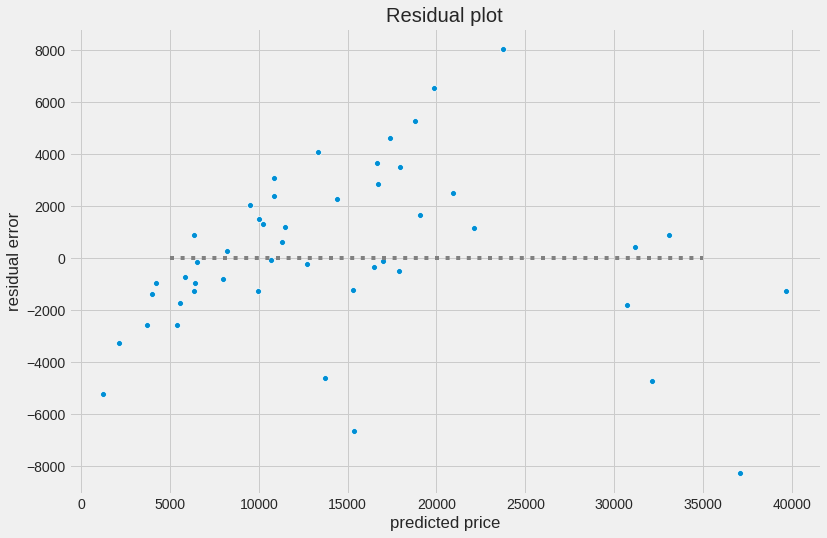

In [47]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.scatterplot(x=pred,y=(pred-y_test))
plt.hlines(0,xmax=35000,xmin=5000,linestyles='dotted',colors='grey')
plt.xlabel('predicted price')
plt.ylabel('residual error')
plt.title('Residual plot')

Text(0.5, 1.0, 'residual histogram')

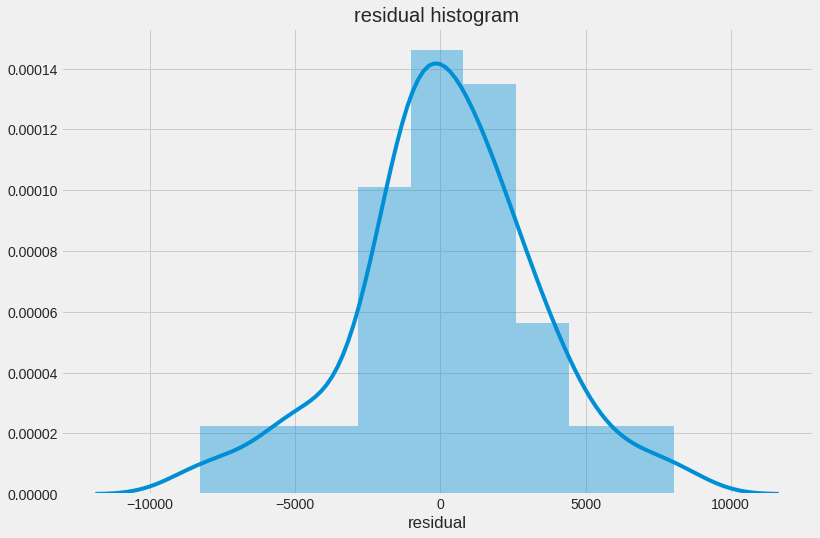

In [48]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.distplot((pred-y_test))
plt.xlabel('residual')
plt.title('residual histogram')

The residual plot indicates homoskedasticity, as variance of error is equally distributed around the ranges. The histogram confirms this by showing a Gaussian curve with mean around 0 and a non-zero std. deviation. The Weighted Least Squares (WLS) regression has improved the model `r2_score` on the test set to about 88.21%. The RMSE value has increased a little, but this model explains the variance in the dataset best given by the R-squared (R2) score.

Final conclusion :-

* The following characteristics of a vehicle prove to be the best predictors for the price of the vehicle. Based on the analysis :-

        * length          * width           * curb_weight
        * engine_size     * horsepower      * bore
        * wheel_base      * aspiration      * drive_wheels
        * fuel_type       * fuel_economy    * engine_type
        * num_of_cylinders

* KNeigbors Regressor with n_neighbors = 1, performed with about 83% R-squared score on the test set. It is the lowest R-squared score and highest RMSE with 3737.26 out of all.
* Linear Regression out performs the KNeighbors Regressor due to linear relationships present between many independent variables and price. It achieved a test set R-squared score of 85.59% and RMSE of 3181.03. The coefficents when observed were too high for some.
* Ridge Regression was used to regularize the coefficients. The model increased the accuracy from Linear Regression by little to a R-squared score of 86.71% and RMSE of 3076.45. The weights have reduced considerably.
* Lasso Regression performed feature selection and removed the following features while building the model.

        * engine_size 
        * fuel_economy
        * drive_wheels_fwd
        * num_of_cylinders_five
        * body_style_hardtop
        
   It achieved a test set R-squared score of 85.86% and RMSE of 3151.20, better than Linear Regression.

        
* ElasticNet captures advantages of both Ridge and Lasso Regression. It reduced the coefficients and removed the following columns,

        * aspiration_turbo
        * fuel_type_gas
        * num_of_cylinders_five
        * body_style_hardtop
        
    It achieved a R-squared of 85.68% and RMSE of 3172.52 on the test set.
    
* The residual plot showed the error was heteroskedastic, i.e. the variance in the error varied between the smallest and largest values of price. To make the errors homoskedastic, Weighted Least Squares (WLS) method is used instead of Ordinary Least Squares (OLS). The weights decided for each sample is the reciprocal of variance.

* The Ridge Regression model with WLS out performs all model with R-squared value of 88.21% on the test set and RMSE of 3125.03. The residual plot shows equal variance for all predictions (not a cone shape) and histogram shows a perfect Gaussian curve with mean 0 and  non-zero std deviation.
    
The model perfectly predicts the price of a vehicle given its various charateristics such as :-

* Car type
* Car length
* Car widht
* Curb weight
* Engine type and size
* Number of cylinders
* Fuel economy
* Wheel drive
* Fuel type
* Aspiration

The model achieves a good sense of these predictors (independent variables) and makes a highly reliable and about accurate prediction.